In [3]:
# 테스트 libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 차트 한글깨짐 방지
import matplotlib as mp
mp.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False

In [9]:
# 파일 encoding 변환
#pd.read_csv('data/crime_in_Seoul.csv', encoding='euc-kr').to_csv('data/crime_in_Seoul.csv', encoding='utf-8', index=False)

In [15]:
print("[서울시 범죄 데이터]")
# index_col=0 인덱스를 첫번째 열로 사용
# thousands=',' 숫자가 1000인 넘으면 1,000 표기되는데, 여기서 , 제거    
df = pd.read_csv('data/crime_in_Seoul.csv', encoding='utf-8', thousands=',', index_col='관서명')
display(df.head(2))

[서울시 범죄 데이터]


,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170
종로서,3,3,6,5,115,98,1070,413,1278,1070


[문제-01] 살인 발생이 가장 높은 관서명, 살인발생, 살인검거를 출력하시오.

In [17]:
mx = df['살인 발생'].max()
df[ df['살인 발생'] == mx ].filter(['살인 발생','살인 검거'])

,살인 발생,살인 검거
관서명,,
영등포서,14,12


[문제-02] 관서별 절도발생, 절도검거에 대한 바차트를 그리시오.

<AxesSubplot:xlabel='관서명'>

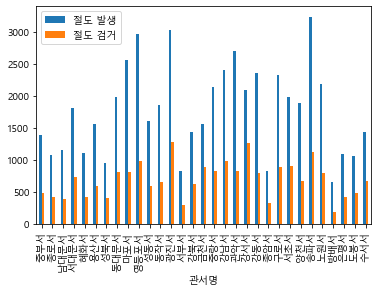

In [19]:
df.plot(kind='bar', y=['절도 발생','절도 검거'])

[문제-03] 절도검거율 컬럼을 추가 하시오.

In [26]:
df['절도 검거율'] = df['절도 검거'] / df['절도 발생'] * 100
df.round(2).sort_values('절도 검거율', ascending=False)

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도 검거율
관서명,,,,,,,,,,,
강서서,7,8,13,13,262,191,2096,1260,3207,2718,60.11
금천서,3,4,6,6,151,122,1567,888,2054,1776,56.67
수서서,10,7,6,6,149,124,1439,666,1819,1559,46.28
서초서,7,4,8,5,334,193,1982,905,1852,1607,45.66
도봉서,3,3,9,10,102,106,1063,478,1487,1303,44.97
강북서,7,8,14,13,153,126,1434,618,2649,2348,43.10
성북서,2,2,2,1,86,71,953,409,1194,1015,42.92
광진서,4,4,14,26,240,220,3026,1277,2625,2180,42.20
동대문서,5,5,13,13,173,146,1981,814,2548,2227,41.09


1. 상관관계(피어슨 관계)
- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [27]:
df.corr() # 상관관계 출력

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도 검거율
살인 발생,1.000000,0.953920,0.640281,0.486899,0.621728,0.572858,0.662590,0.575135,0.754575,0.755763,-0.019993
살인 검거,0.953920,1.000000,0.648964,0.505346,0.575409,0.571278,0.653474,0.587725,0.802798,0.807260,0.014842
강도 발생,0.640281,0.648964,1.000000,0.866390,0.745120,0.798568,0.744599,0.702067,0.793311,0.801213,0.043121
강도 검거,0.486899,0.505346,0.866390,1.000000,0.604698,0.744171,0.710847,0.718638,0.696732,0.699700,0.115837
강간 발생,0.621728,0.575409,0.745120,0.604698,1.000000,0.915617,0.807301,0.781462,0.762625,0.756427,0.071175
강간 검거,0.572858,0.571278,0.798568,0.744171,0.915617,1.000000,0.838196,0.831827,0.800653,0.800535,0.120781
절도 발생,0.662590,0.653474,0.744599,0.710847,0.807301,0.838196,1.000000,0.888714,0.897244,0.889385,-0.084518
절도 검거,0.575135,0.587725,0.702067,0.718638,0.781462,0.831827,0.888714,1.000000,0.846821,0.852488,0.363117
폭력 발생,0.754575,0.802798,0.793311,0.696732,0.762625,0.800653,0.897244,0.846821,1.000000,0.997356,0.071899
폭력 검거,0.755763,0.807260,0.801213,0.699700,0.756427,0.800535,0.889385,0.852488,0.997356,1.000000,0.099122


<AxesSubplot:xlabel='폭력 발생', ylabel='살인 발생'>

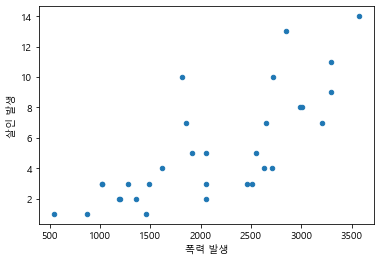

In [28]:
df.plot(kind='scatter', x='폭력 발생', y='살인 발생')